In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.optimizers import RMSprop
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import lstm
import pandas as pd

Using TensorFlow backend.


In [5]:
def load_data(filename):
    data  = pd.read_csv(filename, names = ['timestamp', 'close', 'weighted'])
    return data

def load_data_values(filename):
    data  = pd.read_csv(filename, names = ['timestamp', 'close', 'weighted'])
    data = data["close"]
    return data.values

def normalise_data(dataset):
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    return np.array(dataset)

def prepare_dataset(normalised_dataset, seq_length):
    sequence_length = seq_length + 1
    result = []

    for index in range(len(normalised_values) - sequence_length):
        result.append(normalised_values[index: index + sequence_length])

    result = np.array(result)
    
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) 
    return [x_train, y_train, x_test, y_test]

In [6]:
#Step 1 Load and Normalize data
# dataset = load_data("coinbaseUSD.csv")
dataset = load_data_values("coinbaseUSD.csv")

In [7]:
# # print(dataset['close'])
# dataset['t1'] = dataset['close']
# dataset['t2'] = dataset['close'].shift(+1)
# dataset['delta'] = dataset['t1'] - dataset['t2']
# print dataset[dataset['delta'] < -50]

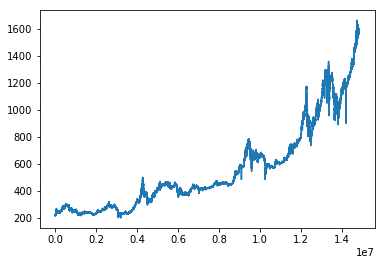

In [8]:
# Print Close values
plt.plot(dataset)
plt.show()

In [23]:
seq_length = 50
# timestamps = dataset[:,0]
normalised_values = normalise_data(dataset.reshape(-1, 1))
X_train, y_train, X_test, y_test = prepare_dataset(normalised_values, seq_length)

In [19]:
def neural_network(seq_length):   
    model = Sequential()
    model.add(LSTM(input_dim=1,output_dim=50,return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(100,return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim=1))
    model.add(Activation('linear'))
    model.compile(loss='mse', optimizer='rmsprop')
    return model

#Step 3 Train the model
model = neural_network(seq_length)
model.fit(X_train, y_train, batch_size=512, nb_epoch=10, validation_data=(X_test, y_test), verbose = 1)

Train on 1840 samples, validate on 204 samples
Epoch 1/10
1840/1840 [==============================] - 3s - loss: 0.0329 - val_loss: 0.0203
Epoch 2/10
1840/1840 [==============================] - 1s - loss: 0.0026 - val_loss: 0.0109
Epoch 3/10
1840/1840 [==============================] - 1s - loss: 0.0022 - val_loss: 0.0084
Epoch 4/10
1840/1840 [==============================] - 1s - loss: 0.0022 - val_loss: 0.0079

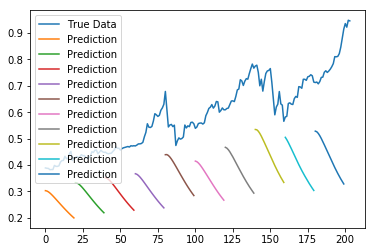

In [20]:
#Step 4 - Plot the predictions
predictions = lstm.predict_sequences_multiple(model, X_test, seq_length, seq_length)
lstm.plot_results_multiple(predictions, y_test, seq_length)